# Who survives in the titatic

This is my solution for the Titanic competition form [Kaggle](https://www.kaggle.com/c/titanic), all the input files are extracted from the mentioned link. I won't upload the datasets to this repository.

I assume there is a 'titanic' folder at the same level of this notebook containing the datasets.

In [9]:
import pandas as pd
import numpy as np

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


According to Kaggle's competition web page, the data dictionary is as follows:

| Variable      | Definition    | Key        |
| ------------- |:-------------:| ----------:|
| survival      | Survival      | 0 = No, 1 = Yes |
| pclass        | Ticket class  | 1 = 1st, 1 = 2nd, 3 = 3rd |
| sex           | Sex           |            |
| Age           | Age in years           |            |
| sibsp         | # of siblings / spouses aboard the Titanic           |            |
| parch         | # of parents / children aboard the Titanic           |            |
| ticket        | Ticket number           |            |
| fare          | Passenger fare           |            |
| cabin         | Cabin number           |            |
| embarked      | Port of Embarkation           | C=Cherbourg, Q=Queenstown, S=Southampton           |

We are supposed to predict the survival, i.e. 'survived', this is our class. This is naturally a binary classification problem.

Now, let's observe how the variables behave.

## Data exploration & transformation

**Notes:**
* Notice we have 891 samples, but not all of them are complete, notice age seems to have some values missing.
* Also, we have some string categorical fields, we should convert them.
* Other string fields might tell us something, we should inspect them to know if we should discard them or not.

First, we observe genere is a string, let's convert it into binary categories.

In [11]:
# Convert Sex to binary categories
train.replace({'Sex': {'male': 1, 'female': 0}}, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


It seems not all values for Cabin are informed, let's see how these distribute.

In [14]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
na_cabin = train["Cabin"].isna().sum()
passengers = train["PassengerId"].count()
cabins = train["Cabin"].count()

print("Proportion of NA cabins vs total passengers {:.2f}".format(na_cabin / passengers))
print("Total of different cabins, including NA {}".format(cabins))

Proportion of NA cabins vs total passengers 0.77
Total of different cabins, including NA 204


We have way too many NA cabins, 77% of the dataset does not have the cabin informed, and we have 203 different cabins, let's see how the cabin field distribute towards the target class.

We might want to convert this field in a binary class, either has cabin or not.

In [79]:
cabin_survive = train.copy()
cabin_survive.Cabin = cabin_survive.Cabin.apply(lambda x: 1 if type(x) is str else 0)
cabin_survive.Cabin.value_counts()

0    687
1    204
Name: Cabin, dtype: int64

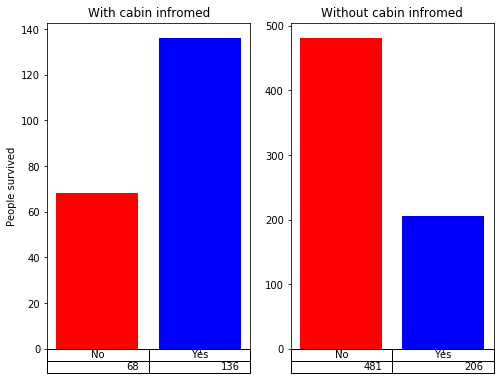

In [166]:
import matplotlib.pyplot as plt

w_cabin = cabin_survive[cabin_survive.Cabin == 1]
wo_cabin = cabin_survive[cabin_survive.Cabin == 0]
w_cabin_counts = w_cabin.Survived.value_counts(sort=False)
wo_cabin_counts = wo_cabin.Survived.value_counts(sort=False)

plt.figure(figsize=(8, 6))
plt.subplot(121)
ax = plt.bar([0, 1], w_cabin_counts, color=["r", "b"], tick_label=["", ""])
plt.ylabel("People survived")
plt.title("With cabin infromed")
plt.table(cellText=w_cabin_counts.to_numpy().reshape(1, 2), colLabels=["No", "Yes"])

plt.subplot(122)
plt.bar([0, 1], wo_cabin_counts, color=["r", "b"], tick_label=["", ""])
plt.table(cellText=wo_cabin_counts.to_numpy().reshape(1, 2), colLabels=["No", "Yes"])
plt.title("Without cabin infromed")

plt.show()

When the field is informed, half of the passengers didn't survived, while without cabin, almost only the half survided compared to those who didn't survived.

One last lookup on those with cabin.

In [181]:
w_cabin_s = train[["PassengerId", "Cabin", "Survived"]].join(
    w_cabin[["PassengerId", "Cabin"]], how="inner", rsuffix="_informed"
)

w_cabin_s.head()

,PassengerId,Cabin,Survived,PassengerId_informed,Cabin_informed
1,2,C85,1,2,1
3,4,C123,1,4,1
6,7,E46,0,7,1
10,11,G6,1,11,1
11,12,C103,1,12,1


In [194]:
survived = w_cabin_s[w_cabin_s.Survived == 1]
survived.Cabin = survived.Cabin.apply(lambda x: x[0])
print("Survivors Cabin Letters")
survived.Cabin.value_counts()

Survivors Cabin Letters


/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/pandas/core/generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


B    35
C    35
D    25
E    24
F     8
A     7
G     2
Name: Cabin, dtype: int64

In [195]:
survived = w_cabin_s[w_cabin_s.Survived == 0]
survived.Cabin = survived.Cabin.apply(lambda x: x[0])
print("Deceased Cabin Letters")
survived.Cabin.value_counts()

Deceased Cabin Letters


/Users/ferro/anaconda3/envs/Deeplearning/lib/python3.6/site-packages/pandas/core/generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C    24
B    12
D     8
E     8
A     8
F     5
G     2
T     1
Name: Cabin, dtype: int64

We can observe presence of all types of cabins (thinking in A, B, C, and D) though more of those in cabins B, C, D, and E had higher survival rate. This field doesn't seem very promising for survival prediction, according to [Titanica](https://www.encyclopedia-titanica.org/cabins.html) The letters represented the deck the cabin is located but not the class, which is another filed in the data set.

So the conclusion is that this field don't contribute very much in the survival prediction of the passenger, however we will include only the deck letter and leave the na with 'X'.

In [ ]:
train["Embarked"].fillna('M', inplace=True)

In [ ]:
train["Embarked"].value_counts()

In [ ]:
import matplotlib.pyplot as plt

x = train["Embarked"].unique()
y = train["Embarked"].value_counts()
plt.bar(x, y)
plt.show()

In [ ]:
train.describe()

In [ ]:
train.corr()

In [ ]:
import matplotlib.pyplot as plt

